In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

# CorInfoMax

In [2]:
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST_V2.pkl")
print(df_results.shape)
df_results.columns

(36, 7)
(5, 7)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list', 'forward_backward_weight_angle_list'],
      dtype='object')

In [3]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,forward_backward_weight_angle_list,Trn_ACC,Tst_ACC
0,1,0,CorInfoMax,"{'lr_start': {'ff': [0.2, 0.15], 'fb': [0.15, ...","[0.7342166666666666, 0.7549833333333333, 0.760...","[0.7237, 0.7435, 0.7494, 0.7555, 0.8474, 0.853...","[[92.144775390625], [85.33397674560547], [81.7...",0.906033,0.8795
1,1,10,CorInfoMax,"{'lr_start': {'ff': [0.2, 0.15], 'fb': [0.15, ...","[0.7681833333333333, 0.8375666666666667, 0.853...","[0.7581, 0.8258, 0.8398, 0.8439, 0.8495, 0.850...","[[90.99727630615234], [84.4177474975586], [80....",0.904317,0.8773
2,1,20,CorInfoMax,"{'lr_start': {'ff': [0.2, 0.15], 'fb': [0.15, ...","[0.6941166666666667, 0.7117166666666667, 0.789...","[0.6908, 0.7031, 0.7797, 0.8407, 0.8448, 0.852...","[[89.6445083618164], [84.45266723632812], [81....",0.728617,0.7173
3,1,30,CorInfoMax,"{'lr_start': {'ff': [0.2, 0.15], 'fb': [0.15, ...","[0.8254166666666667, 0.8523666666666667, 0.854...","[0.8127, 0.8366, 0.8398, 0.8439, 0.8536, 0.855...","[[89.8475341796875], [84.97752380371094], [81....",0.904583,0.8782
4,1,40,CorInfoMax,"{'lr_start': {'ff': [0.2, 0.15], 'fb': [0.15, ...","[0.74005, 0.8287, 0.85505, 0.8662833333333333,...","[0.7312, 0.8194, 0.8402, 0.8475, 0.8534, 0.858...","[[88.94344329833984], [82.97907257080078], [79...",0.904200,0.8753


In [4]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.86955,0.84552


In [5]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

In [6]:
df_results.loc[df_results["setting_number"] == best_setting].iloc[0]['Hyperparams']

{'lr_start': {'ff': array([0.2 , 0.15]), 'fb': array([0.15, 0.1 ])},
 'lr_decay_multiplier': 0.95,
 'neural_dynamic_iterations_free': 30,
 'neural_dynamic_iterations_nudged': 10,
 'neural_lr_rule': 'constant',
 'neural_lr': 0.07,
 'epsilon': 0.15,
 'lambda': 0.99999,
 'architecture': [784, 500, 10],
 'three_phase': False}

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


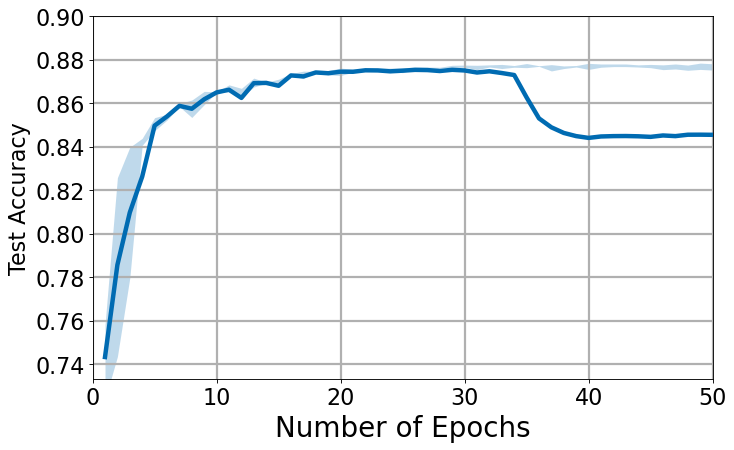

In [7]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

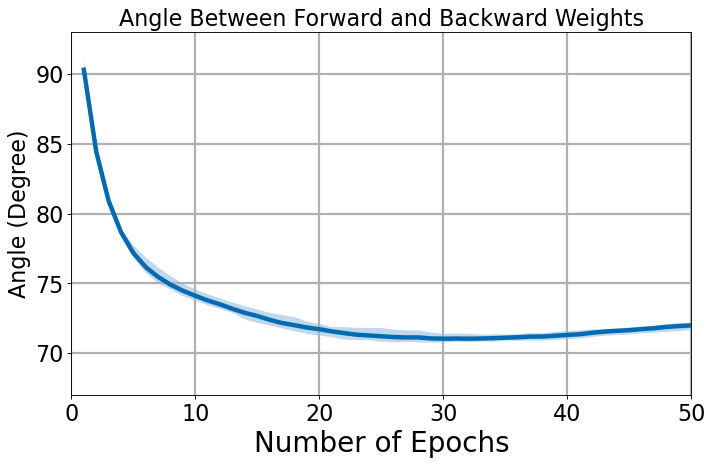

In [8]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['forward_backward_weight_angle_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Angle (Degree)',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Angle Between Forward and Backward Weights")
plt.axis([0.0,50,67, 93])
ApplyFont(plt.gca())

# CSM

In [9]:
df_results = pd.read_pickle(r"../Results/simulation_results_CSM_FashionMNIST.pkl")
print(df_results.shape)
df_results.columns

(4, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [10]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8405166666666667, 0.8632833333333333, 0.871...","[0.8254, 0.848, 0.8559, 0.8606, 0.8637, 0.8598...",0.962350,0.8888
1,1,10,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.85055, 0.8664166666666666, 0.87006666666666...","[0.836, 0.8482, 0.852, 0.8576, 0.8517, 0.8504,...",0.960017,0.8875
2,1,20,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8478333333333333, 0.8625666666666667, 0.871...","[0.8285, 0.8464, 0.8523, 0.8482, 0.8584, 0.871...",0.962983,0.8892
3,1,30,CSM,"{'alphas_W': [0.1, 0.06], 'alphas_M': [-0.002]...","[0.8459666666666666, 0.8563166666666666, 0.880...","[0.8308, 0.8417, 0.8589, 0.852, 0.8594, 0.8583...",0.962900,0.8845


In [11]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.962063,0.8875


In [12]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

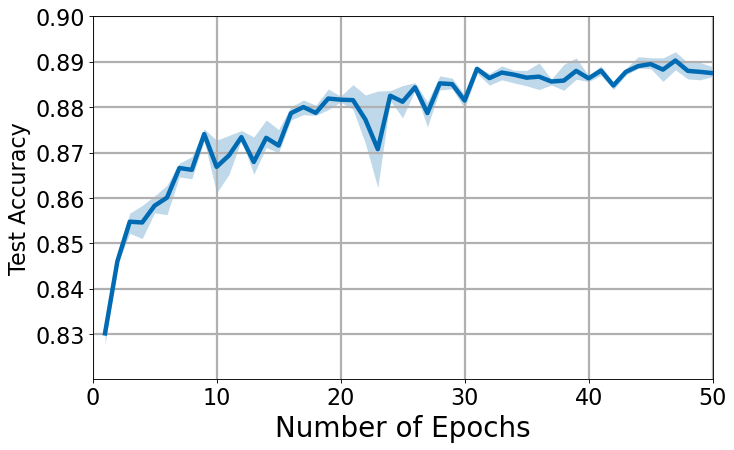

In [13]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# EP

In [14]:
df_results = pd.read_pickle(r"../Results/simulation_results_EP_FashionMNIST.pkl")
print(df_results.shape)
df_results.columns

(35, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [15]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8478166666666667, 0.8621666666666666, 0.879...","[0.8343, 0.8435, 0.8603, 0.8408, 0.8664, 0.854...",0.942483,0.8792
1,1,10,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8427, 0.8701, 0.87095, 0.8838666666666667, ...","[0.8285, 0.8535, 0.849, 0.8621, 0.8563, 0.8657...",0.944200,0.8861
2,1,20,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8571333333333333, 0.8622166666666666, 0.883...","[0.843, 0.8467, 0.8636, 0.853, 0.8567, 0.8634,...",0.945367,0.8854
3,1,30,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8452166666666666, 0.8613166666666666, 0.879...","[0.8325, 0.8448, 0.8625, 0.8377, 0.8593, 0.852...",0.930267,0.8689
4,1,40,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8511, 0.8641166666666666, 0.867433333333333...","[0.8361, 0.8492, 0.8473, 0.8579, 0.8602, 0.868...",0.915250,0.8611
5,1,50,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8499, 0.8563333333333333, 0.86625, 0.873616...","[0.835, 0.8403, 0.8471, 0.852, 0.8636, 0.8681,...",0.946617,0.8844
6,1,60,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8459333333333333, 0.87145, 0.87036666666666...","[0.8351, 0.8538, 0.8496, 0.841, 0.8434, 0.8675...",0.941617,0.8768
7,1,70,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8495666666666667, 0.84615, 0.87355, 0.88081...","[0.8365, 0.8363, 0.8506, 0.8641, 0.8696, 0.861...",0.914650,0.8591
8,1,80,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8570666666666666, 0.8598666666666667, 0.872...","[0.8411, 0.8419, 0.8528, 0.8654, 0.8595, 0.87,...",0.932733,0.8763
9,1,90,EP,"{'alphas_W': [0.1, 0.05], 'T1': 20, 'T2': 4, '...","[0.8546666666666667, 0.8646666666666667, 0.880...","[0.8408, 0.8483, 0.861, 0.8497, 0.8622, 0.8703...",0.942633,0.8837


In [16]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.935582,0.87610
1,2,0.935488,0.87612
2,3,0.950963,0.88185
3,4,0.952787,0.88316


In [17]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

4.0

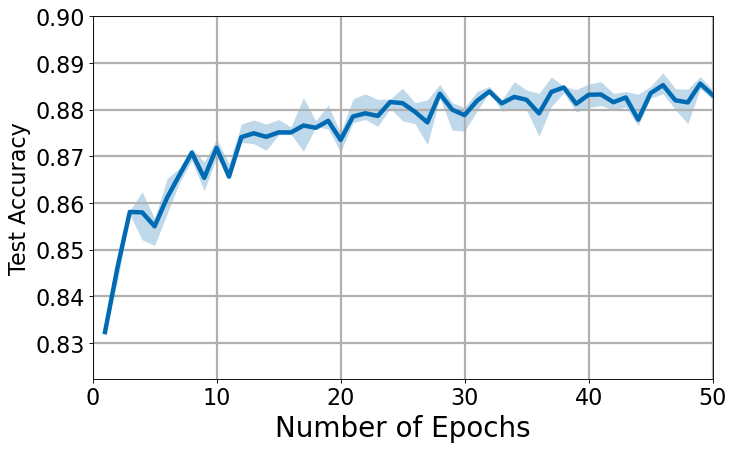

In [18]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# EP-Continual-Weight-Update

# PC

In [19]:
df_results = pd.read_pickle(r"../Results/simulation_results_PC_FashionMNIST.pkl")
print(df_results.shape)
df_results.columns

(40, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [20]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8602666666666666, 0.87755, 0.89028333333333...","[0.8465, 0.8613, 0.8719, 0.8738, 0.8736, 0.878...",0.868717,0.8326
1,1,10,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8643, 0.8769, 0.8866333333333334, 0.8957833...","[0.8496, 0.8573, 0.8634, 0.8694, 0.8726, 0.878...",0.876783,0.8451
2,1,20,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8606166666666667, 0.8673833333333333, 0.887...","[0.846, 0.8503, 0.8663, 0.8696, 0.8769, 0.8719...",0.886800,0.8525
3,1,30,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8553, 0.8804833333333333, 0.89065, 0.898, 0...","[0.8396, 0.8666, 0.8694, 0.8733, 0.8699, 0.879...",0.869617,0.8414
4,1,40,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8582, 0.8801833333333333, 0.882333333333333...","[0.8462, 0.8639, 0.8594, 0.8737, 0.8754, 0.873...",0.874450,0.8404
5,1,50,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.85225, 0.8766, 0.8901333333333333, 0.885116...","[0.8362, 0.8591, 0.8687, 0.8611, 0.8787, 0.875...",0.886200,0.8517
6,1,60,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8589833333333333, 0.8816166666666667, 0.889...","[0.8475, 0.864, 0.8693, 0.8752, 0.8768, 0.8785...",0.891800,0.8550
7,1,70,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8608, 0.8767333333333334, 0.885166666666666...","[0.844, 0.8581, 0.8648, 0.8754, 0.8688, 0.8574...",0.884967,0.8524
8,1,80,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8652166666666666, 0.8790166666666667, 0.888...","[0.8492, 0.862, 0.8647, 0.8719, 0.847, 0.8778,...",0.887483,0.8562
9,1,90,PC,"{'lr': 0.001, 'neural_lr_start': 0.1, 'neural_...","[0.8564833333333334, 0.87545, 0.8889, 0.894933...","[0.8436, 0.8581, 0.8653, 0.8684, 0.8661, 0.867...",0.890350,0.8551


In [21]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.881717,0.84824
1,2,0.914528,0.86851
2,3,0.929618,0.88274
3,4,0.948308,0.89313


In [22]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting# = 3

4.0

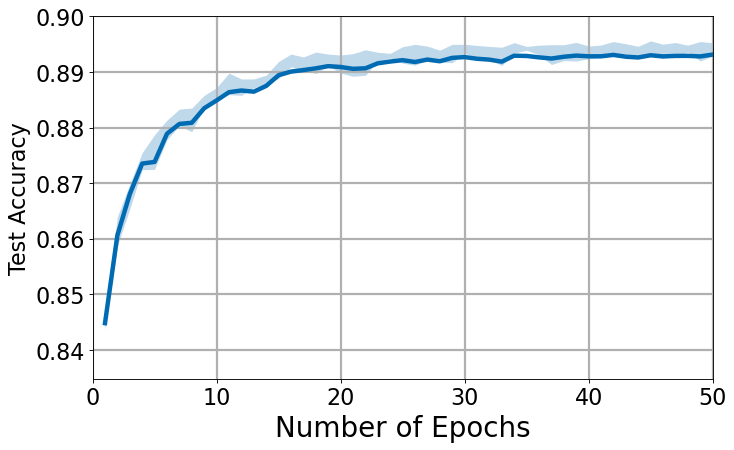

In [23]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# PC-Nudge

In [24]:
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST.pkl")
print(df_results.shape)
df_results = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST_V2.pkl")
print(df_results.shape)
df_results.columns

(6, 6)
(2, 6)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list'],
      dtype='object')

In [25]:
df_results['Trn_ACC'] = df_results.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results['Tst_ACC'] = df_results.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,Trn_ACC,Tst_ACC
0,1,0,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8411166666666666, 0.8611, 0.860033333333333...","[0.8311, 0.8488, 0.8465, 0.8624, 0.8516, 0.863...",0.93280,0.8867
1,1,10,PCNudge,"{'lr': 0.001, 'supervised_lambda_weight': 0.00...","[0.8419833333333333, 0.8620833333333333, 0.865...","[0.8323, 0.8486, 0.8519, 0.8617, 0.8639, 0.866...",0.93545,0.8883


In [26]:
df_setting = df_results[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
df_setting

,setting_number,Trn_ACC,Tst_ACC
0,1,0.934125,0.8875


In [27]:
best_setting = df_setting.iloc[df_setting['Trn_ACC'].argmax()]['setting_number']
best_setting

1.0

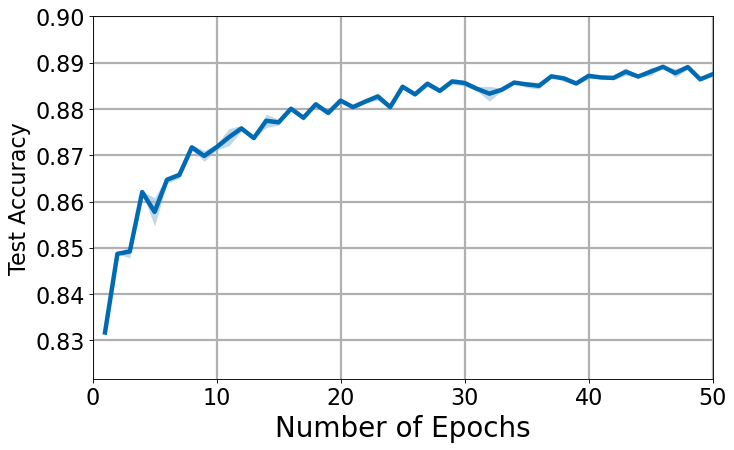

In [28]:
data = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

x = np.arange(1, mean_.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, mean_, linewidth=4, color='#006BB2')
plt.fill_between(x, perc_25, perc_75, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("")
plt.axis([0.0,50,mean_[0] - 0.01,0.90])
ApplyFont(plt.gca())

# Altogether

### Read EP Results

In [29]:
df_results_ep = pd.read_pickle(r"../Results/simulation_results_EP_FashionMNIST.pkl")
df_results_ep['Trn_ACC'] = df_results_ep.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_ep['Tst_ACC'] = df_results_ep.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_ep = df_results_ep[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_ep = df_setting_ep.iloc[df_setting_ep['Trn_ACC'].argmax()]['setting_number']

data_ep_tst = np.stack(df_results_ep.loc[df_results_ep["setting_number"] == best_setting_ep]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_ep_trn = np.stack(df_results_ep.loc[df_results_ep["setting_number"] == best_setting_ep]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_ep_tst, perc_25_ep_tst, perc_75_ep_tst, std_data_ep_tst = perc(data_ep_tst)
mean_ep_trn, perc_25_ep_trn, perc_75_ep_trn, std_data_ep_trn = perc(data_ep_trn)

### Read CSM Results

In [30]:
df_results_csm = pd.read_pickle(r"../Results/simulation_results_CSM_FashionMNIST.pkl")
df_results_csm['Trn_ACC'] = df_results_csm.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_csm['Tst_ACC'] = df_results_csm.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_csm = df_results_csm[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_csm = df_setting_csm.iloc[df_setting_csm['Trn_ACC'].argmax()]['setting_number']

data_csm_tst = np.stack(df_results_csm.loc[df_results_csm["setting_number"] == best_setting_csm]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_csm_trn = np.stack(df_results_csm.loc[df_results_csm["setting_number"] == best_setting_csm]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_csm_tst, perc_25_csm_tst, perc_75_csm_tst, std_data_csm_tst = perc(data_csm_tst)
mean_csm_trn, perc_25_csm_trn, perc_75_csm_trn, std_data_csm_trn = perc(data_csm_trn)

### Read PC Results

In [31]:
df_results_pc = pd.read_pickle(r"../Results/simulation_results_PC_FashionMNIST.pkl")
df_results_pc['Trn_ACC'] = df_results_pc.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_pc['Tst_ACC'] = df_results_pc.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_pc = df_results_pc[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_pc = df_setting_pc.iloc[df_setting_pc['Trn_ACC'].argmax()]['setting_number']

data_pc_tst = np.stack(df_results_pc.loc[df_results_pc["setting_number"] == best_setting_pc]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_pc_trn = np.stack(df_results_pc.loc[df_results_pc["setting_number"] == best_setting_pc]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_pc_tst, perc_25_pc_tst, perc_75_pc_tst, std_data_pc_tst = perc(data_pc_tst)
mean_pc_trn, perc_25_pc_trn, perc_75_pc_trn, std_data_pc_trn = perc(data_pc_trn)

### Read PC-Nudge Results

In [32]:
df_results_pcn = pd.read_pickle(r"../Results/simulation_results_PCNudge_FashionMNIST_V2.pkl")
df_results_pcn['Trn_ACC'] = df_results_pcn.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_pcn['Tst_ACC'] = df_results_pcn.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_pcn = df_results_pcn[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_pcn = df_setting_pcn.iloc[df_setting_pcn['Trn_ACC'].argmax()]['setting_number']

data_pcn_tst = np.stack(df_results_pcn.loc[df_results_pcn["setting_number"] == best_setting_pcn]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_pcn_trn = np.stack(df_results_pcn.loc[df_results_pcn["setting_number"] == best_setting_pcn]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_pcn_tst, perc_25_pcn_tst, perc_75_pcn_tst, std_data_pcn_tst = perc(data_pcn_tst)
mean_pcn_trn, perc_25_pcn_trn, perc_75_pcn_trn, std_data_pcn_trn = perc(data_pcn_trn)

### Read CorInfoMax Results

In [33]:
df_results_corinfo = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_FashionMNIST_V2.pkl")
df_results_corinfo['Trn_ACC'] = df_results_corinfo.apply(lambda row: row['Trn_ACC_list'][-1], axis = 1)
df_results_corinfo['Tst_ACC'] = df_results_corinfo.apply(lambda row: row['Tst_ACC_list'][-1], axis = 1)
df_setting_corinfo = df_results_corinfo[['setting_number', 'Trn_ACC', 'Tst_ACC']].groupby('setting_number').mean().reset_index()
best_setting_corinfo = df_setting_corinfo.iloc[df_setting_corinfo['Trn_ACC'].argmax()]['setting_number']
best_setting_corinfo = 1

data_corinfo_tst = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Tst_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_corinfo_trn = np.stack(df_results_corinfo.loc[df_results_corinfo["setting_number"] == best_setting_corinfo]['Trn_ACC_list'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_corinfo_tst, perc_25_corinfo_tst, perc_75_corinfo_tst, std_data_corinfo_tst = perc(data_corinfo_tst)
mean_corinfo_trn, perc_25_corinfo_trn, perc_75_corinfo_trn, std_data_corinfo_trn = perc(data_corinfo_trn)

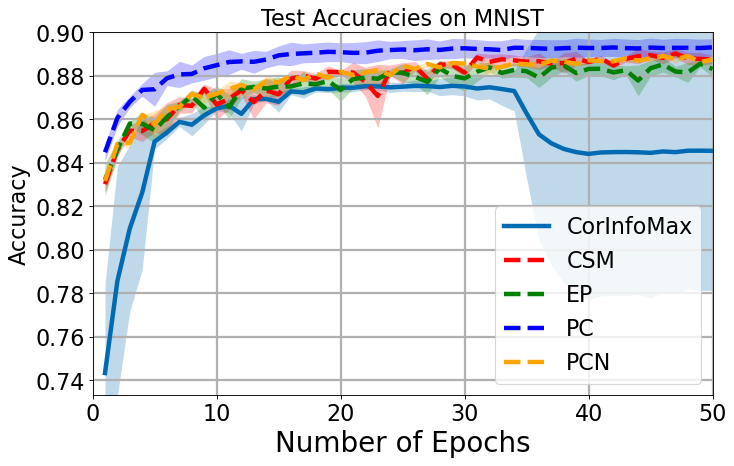

In [34]:
x = np.arange(1, mean_corinfo_tst.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)


plt.plot(x, mean_corinfo_tst, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_corinfo_tst - std_data_corinfo_tst, mean_corinfo_tst + std_data_corinfo_tst, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(x, mean_csm_tst, 'r--', linewidth=4, label = "CSM")
plt.fill_between(x, mean_csm_tst - std_data_csm_tst, mean_csm_tst + std_data_csm_tst, color = 'red', alpha=0.25, linewidth=0)

plt.plot(x, mean_ep_tst, 'g--', linewidth=4, label = "EP")
plt.fill_between(x, mean_ep_tst - std_data_ep_tst, mean_ep_tst + std_data_ep_tst, color = 'green', alpha=0.25, linewidth=0)

plt.plot(x, mean_pc_tst, 'b--', linewidth=4, label = "PC")
plt.fill_between(x, mean_pc_tst - std_data_pc_tst, mean_pc_tst + std_data_pc_tst, color = 'blue', alpha=0.25, linewidth=0)

plt.plot(x, mean_pcn_tst, '--', color = "orange", linewidth=4, label = "PCN")
plt.fill_between(x, mean_pcn_tst - std_data_pcn_tst, mean_pcn_tst + std_data_pcn_tst, color = 'orange', alpha=0.25, linewidth=0)


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Test Accuracies on MNIST",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
plt.axis([0.0,50,mean_corinfo_tst[0] - 0.01,0.90])
ApplyFont(plt.gca())

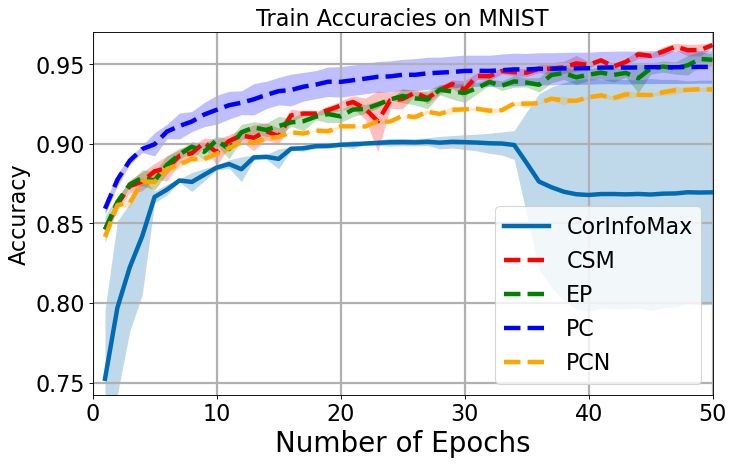

In [35]:
x = np.arange(1, mean_corinfo_trn.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)


plt.plot(x, mean_corinfo_trn, linewidth=4, color='#006BB2', label = "CorInfoMax")
plt.fill_between(x, mean_corinfo_trn - std_data_corinfo_trn, mean_corinfo_trn + std_data_corinfo_trn, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(x, mean_csm_trn, 'r--', linewidth=4, label = "CSM")
plt.fill_between(x, mean_csm_trn - std_data_csm_trn, mean_csm_trn + std_data_csm_trn, color = 'red', alpha=0.25, linewidth=0)

plt.plot(x, mean_ep_trn, 'g--', linewidth=4, label = "EP")
plt.fill_between(x, mean_ep_trn - std_data_ep_trn, mean_ep_trn + std_data_ep_trn, color = 'green', alpha=0.25, linewidth=0)

plt.plot(x, mean_pc_trn, 'b--', linewidth=4, label = "PC")
plt.fill_between(x, mean_pc_trn - std_data_pc_trn, mean_pc_trn + std_data_pc_trn, color = 'blue', alpha=0.25, linewidth=0)

plt.plot(x, mean_pcn_trn, '--', color = "orange", linewidth=4, label = "PCN")
plt.fill_between(x, mean_pcn_trn - std_data_pcn_trn, mean_pcn_trn + std_data_pcn_trn, color = 'orange', alpha=0.25, linewidth=0)


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Train Accuracies on MNIST",fontsize=25)
plt.legend(fontsize = 20, loc = "best")
plt.axis([0.0,50,mean_corinfo_trn[0] - 0.01,0.97])
ApplyFont(plt.gca())